In [137]:
import numpy as np 
from empiricaldist import Pmf 
import pandas as pd 
import matplotlib.pyplot as plt 

# 估数

## 土豪结婚

>某天一个土豪新郎结婚。土豪就是土豪，你不知道新郎会请几辆礼车，但你知道那些礼车是从 1 到 n 标号的。你打开窗户，看到了第 60 号礼车。请问，这位土豪最有可能请了多少辆礼车？

![](media/car_60.png)

我们可以把这个问题和「骰子」问题联系起来。你可以这么想：有从 1 到 n 个骰子，1 号骰子有 1 面，2 号骰子有 2 面，n 号有 n 面。随机抽了一颗骰子，随手一抛，看到数字 60。请问这颗骰子最有可能是哪一颗？

具体到 prior，我们假设有 1000 辆车，概率我们用 uniform probabilities。

In [138]:
hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)

In [139]:
def update_posterior(prior, data):
    '''to upate posterior in this example 
    prior: empiricaldist.Pmf object 
    data: e.g., 60
    '''
    # likelihood is 1/hypos because, say num 60 is only 1/100 chance in dice #100
    likelihood = 1 / hypos 
    # dice #1-data are impossible
    likelihood[data > hypos] = 0 
    posterior = prior.copy()
    posterior *= likelihood 
    posterior.normalize()
    return posterior

In [140]:
posterior = update_posterior(prior, data = 60)

In [141]:
def draw_posterior(posterior, xlabel, c, legend_text, s=4):
    """
    posterior: posterior, a empiricaldist.Pmf object
    xlabel: xlabel you want to see in the plot 
    c: color of the dots 
    legend_text: text for the legend
    s: size of the dots
    """
    df = pd.DataFrame(posterior, columns=['probs'])
    df = df.reset_index(names = xlabel)
    df.plot.scatter(
        x = xlabel,
        y = 'probs',
        color = c, 
        s = s,
        label = legend_text
    )
    plt.ylabel("Probability mass function")
    plt.legend()
    plt.title("Posterior distribution")
    plt.show()

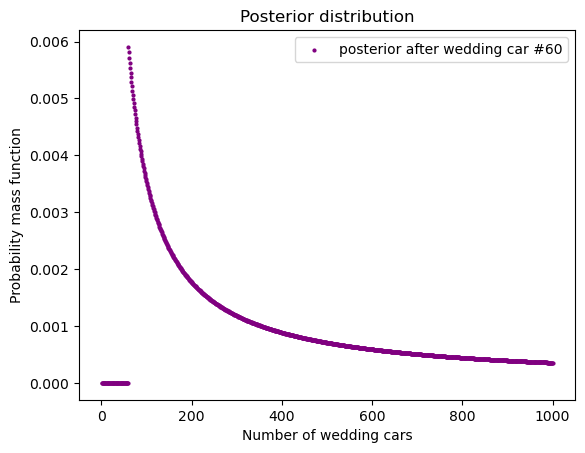

In [142]:
draw_posterior(
    posterior, 'Number of wedding cars', 
    c = 'purple', legend_text="posterior after wedding car #60")

### 不同 prior 

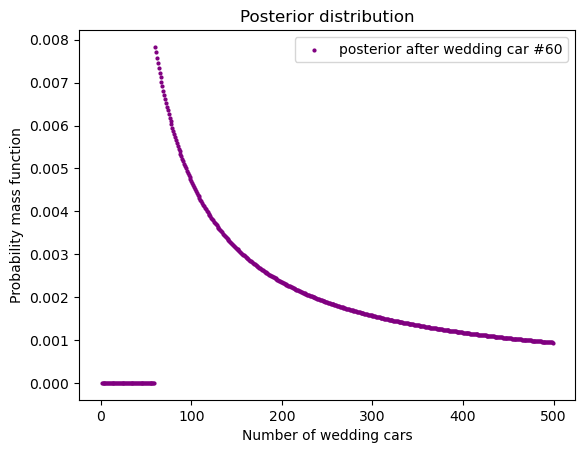

In [143]:
hypos = np.arange(1, 500)
prior = Pmf(1, hypos)
posterior = update_posterior(prior, data = 60)
draw_posterior(
    posterior, 'Number of wedding cars', 
    c = 'purple', legend_text="posterior after wedding car #60")

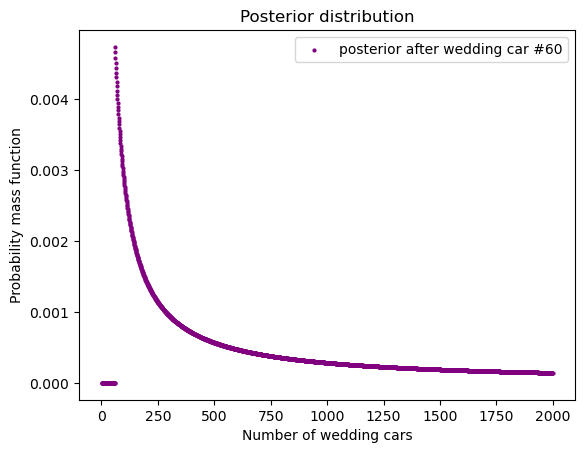

In [144]:
hypos = np.arange(1, 2000)
prior = Pmf(1, hypos)
posterior = update_posterior(prior, data = 60)
draw_posterior(
    posterior, 'Number of wedding cars', 
    c = 'purple', legend_text="posterior after wedding car #60")

我们看到，当 prior 不同时，结果会不一样。这说明，在这个例子中，我们的数据不够，因此不同的 prior 导致 posterior 不同。

### 更多数据

假如我们有更多的数据，比如，我们知道不仅有 60 号车，我们还看到了 30 号和 90 号车。这就和我们第一次随机抽了一颗骰子，随机抛掷，见了 60。然后再次随机抛掷，30。再次随机抛掷，见了 90。这个问题和「一百零一只碗」类似。每次抛掷，我们重新计算 posterior。第二次的 prior 就是第一次的 posterior，但是 likelihood 每次有肯能不一样。

假设 prior 不变的话，根据新数据计算出来的 posterior：


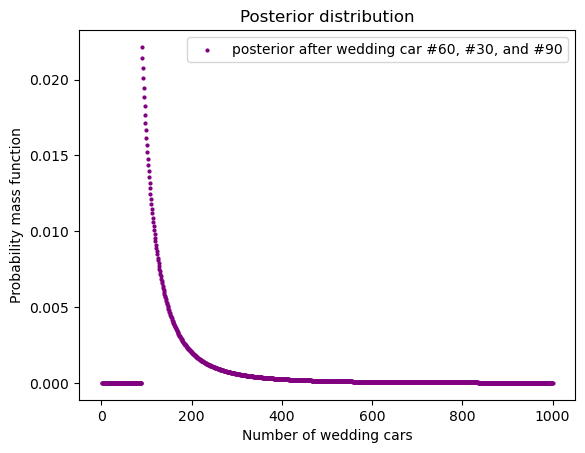

In [145]:
hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)
dataset = [60, 30,90]
posterior = prior.copy()
for data in dataset:
    posterior = update_posterior(posterior, data=data)
draw_posterior(
    posterior, 'Number of wedding cars', 
    c = 'purple', legend_text="posterior after wedding car #60, #30, and #90")

我们可以检测一下，如果把 1000 辆改为 2000 辆，结果有什么不同：

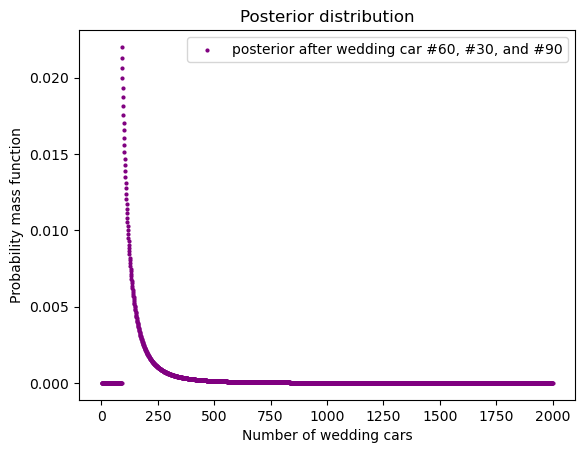

In [146]:
hypos = np.arange(1, 2001)
prior = Pmf(1, hypos)
dataset = [60, 30,90]
posterior = prior.copy()
for data in dataset:
    posterior = update_posterior(posterior, data=data)
draw_posterior(
    posterior, 'Number of wedding cars', 
    c = 'purple', legend_text="posterior after wedding car #60, #30, and #90")

我们看到结果差不多。这就说明随着数据的增多，不同的 prior 对结果的影响变小。